# Testing the module

Here I test the baseline with K-cores.

## Basic miscellaneous tests

### Preprocessing + basicDrawing

In [1]:
import numpy as np
import scipy.sparse as sps
import networkx as nx
import kwextractor_miscellaneous as kwmisc #import the module
%matplotlib inline

In [2]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()
    
(words,txt)=kwmisc.NormalizeTextFromRaw(raw)
#print(txt)
#print(words)
gow_adj = kwmisc.BuildUndirectedGoW(txt,words, window=3)
gow = nx.Graph(gow_adj)

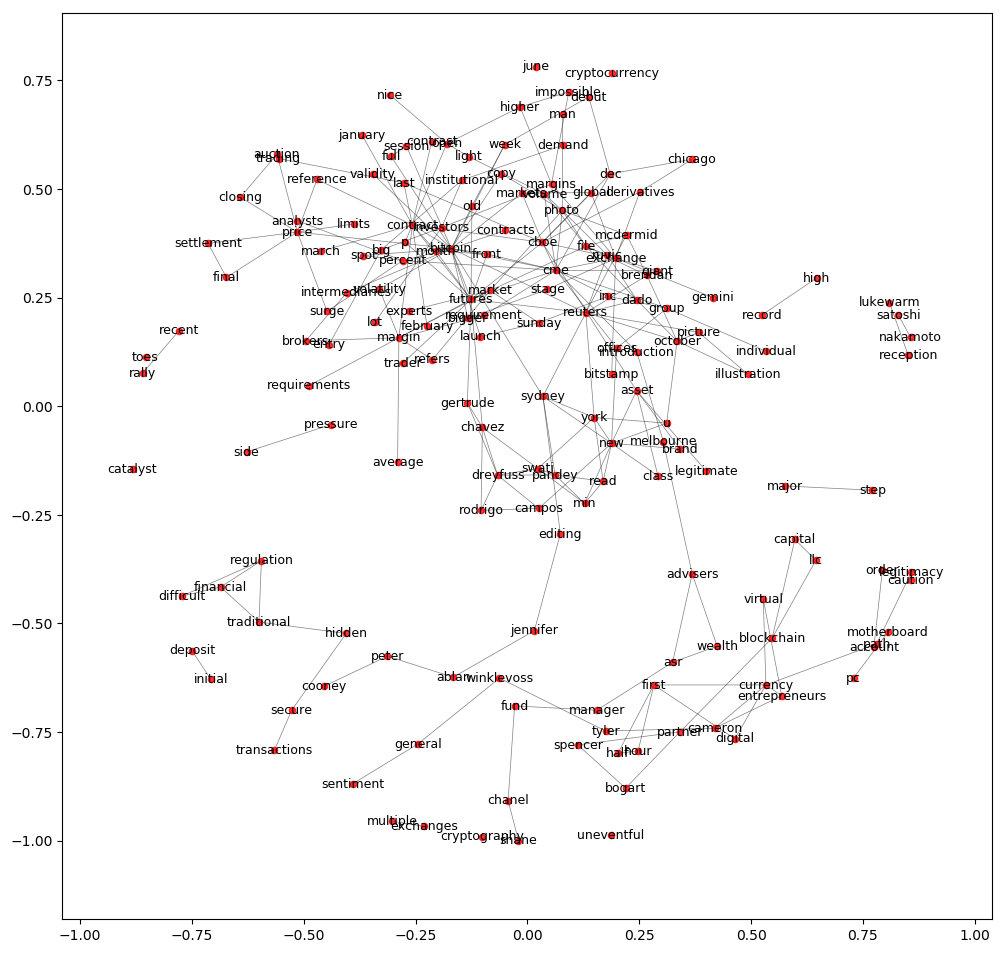

In [3]:
kwmisc.BasicDraw(gow,words)

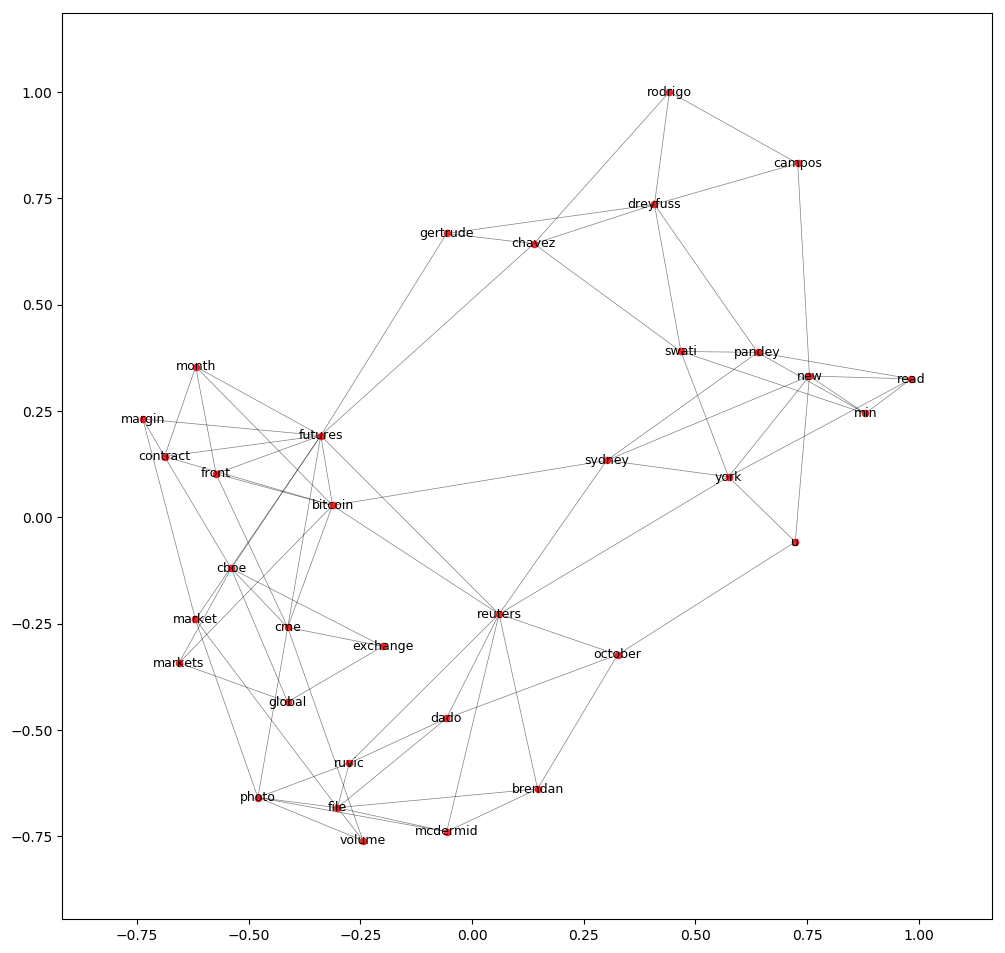

In [4]:
kcore=nx.algorithms.core.k_core(gow)
kwmisc.BasicDraw(kcore, list(words[kcore.nodes]))

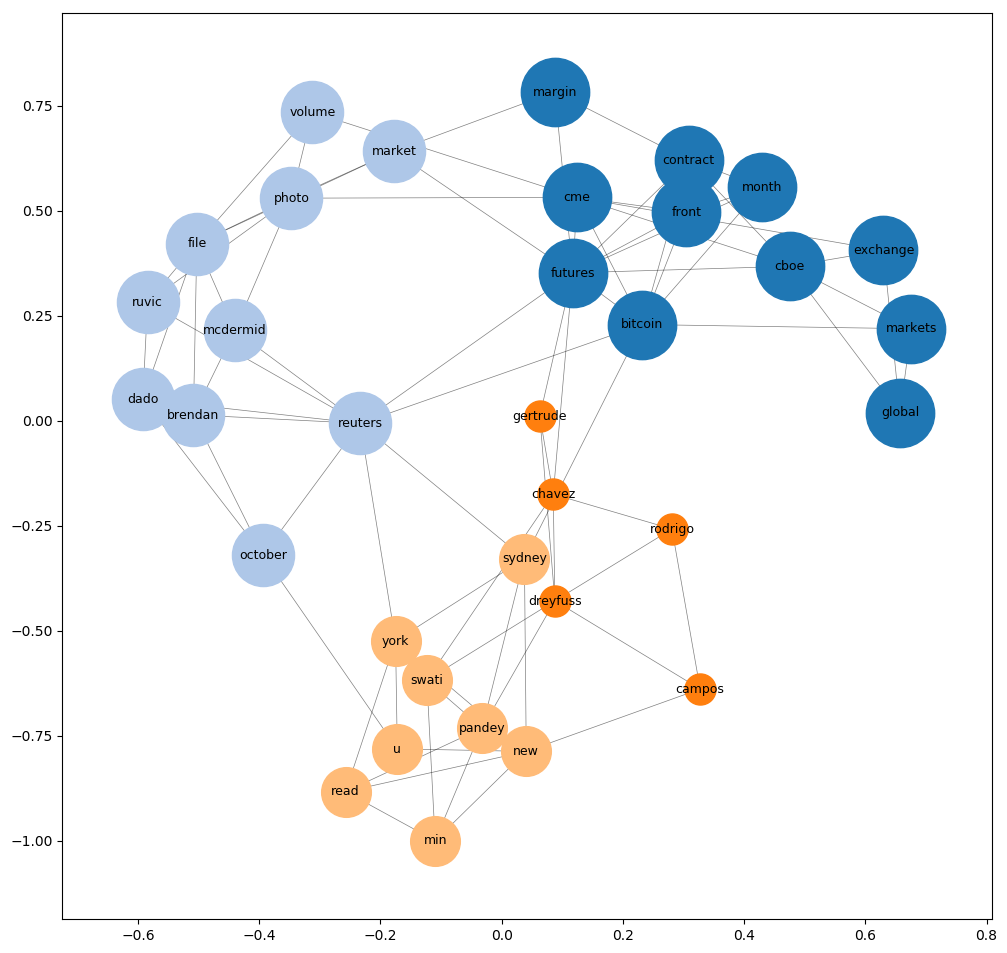

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import community #python-louvain

communities=kwmisc.LouvainCommunitiesPlot(kcore,words[list(kcore.nodes)])

In [6]:
import collections

counterObj = collections.Counter(communities.values())
kwdCluster_id= counterObj.most_common(1)[0][0]
print(kwdCluster_id)
print(np.array(list(communities.values())))
print(np.where(np.array(list(communities.values()))==kwdCluster_id))
print(np.array(list(communities.keys()))[np.where(np.array(list(communities.values()))==kwdCluster_id)])
kwds = words[np.array(list(communities.keys()))[np.where(np.array(list(communities.values()))==kwdCluster_id)]]
print(kwds)

0
[1 2 0 1 3 2 0 2 3 0 0 3 1 3 2 0 1 0 0 1 2 0 1 0 1 0 1 3 0 3 1 3 1 3]
(array([ 2,  6,  9, 10, 15, 17, 18, 21, 23, 25, 28], dtype=int64),)
[ 10  22  28  29  49  57  60  65  97 100 104]
['bitcoin' 'cboe' 'cme' 'contract' 'exchange' 'front' 'futures' 'global'
 'margin' 'markets' 'month']


## Final baseline method

In [7]:
import kwextractor_methods as kwmeth

In [8]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.kCoreLouvainExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!!

['bitcoin' 'cboe' 'cme' 'contract' 'exchange' 'front' 'futures' 'global'
 'margin' 'markets' 'month']


## Girvan-Newman with Choice of Best Modularity

In [9]:
import kwextractor_methods as kwmeth

In [10]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.kCoreGirvanNewmanExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!! 

['global' 'margin' 'markets' 'month' 'bitcoin' 'cme' 'exchange' 'cboe'
 'front' 'futures' 'contract']


## Label Propagation Communities

In [11]:
import kwextractor_methods as kwmeth

In [12]:
with open("./data/test/reuters.txt") as fin:
    raw = fin.read()

kwds = kwmeth.kCoreFluidExtractor(raw,window=3,verbose=False)
print(kwds)
#PICTURES ARE GREAT!!!!!! 

2
3
4
5
6
['global' 'margin' 'markets' 'month' 'bitcoin' 'futures' 'exchange' 'cboe'
 'front' 'cme' 'contract' 'gertrude']
